In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('diabetes.csv')

In [2]:
# Part A: Data Preprocessing

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


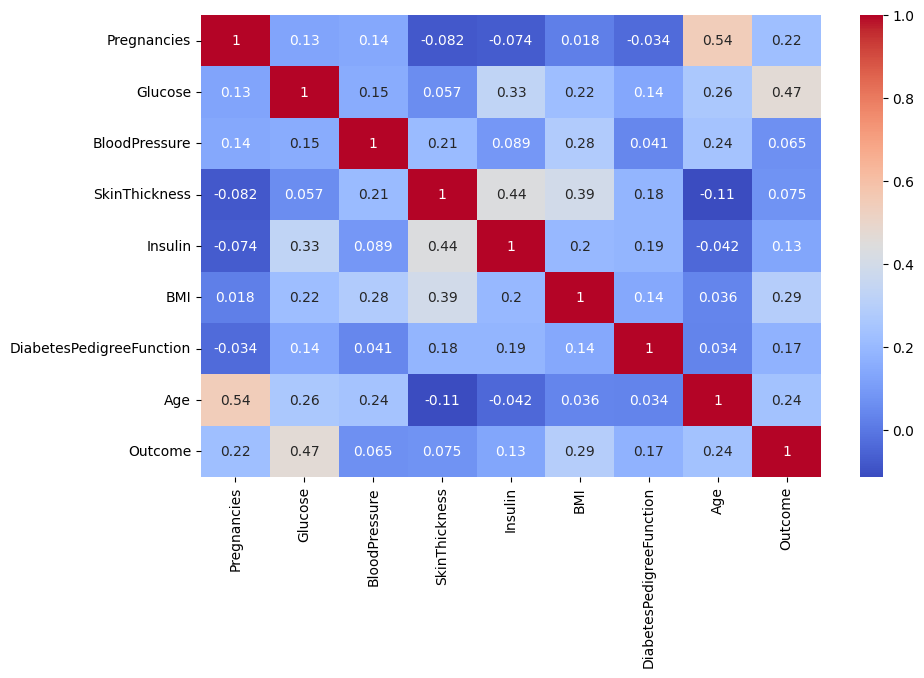

In [5]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
# Split the data into train (70%) and test (30%) sets.

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Outcome', axis=1), df['Outcome'], test_size=0.3, random_state=20)



# Part A: Data Preprocessing completed




In [8]:
# Part B: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)





In [9]:
# coefficients and intercept
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)

Coefficients: [[ 1.52252616e-01  3.75780029e-02 -2.35622589e-02  5.76421476e-04
  -1.63906573e-03  1.02286824e-01  9.77556914e-01  1.28091155e-02]]
Intercept: [-8.4104096]


In [10]:
Y_pred = log_reg.predict(X_test)

log_reg_metrics={
    "actual": Y_test,
    "predicted": Y_pred,
    "accuracy_score": accuracy_score(Y_test, Y_pred),
    "confusion_matrix": confusion_matrix(Y_test, Y_pred),
    "classification_report": classification_report(Y_test, Y_pred),
    "precision": precision_score(Y_test, Y_pred),
    "recall": recall_score(Y_test, Y_pred),
    "f1_score": f1_score(Y_test, Y_pred)
}
print("================== Evaluation Metrics =================")

print("Accuracy:", log_reg_metrics["accuracy_score"])

print("--------------------------------------------------")
print("Confusion Matrix:\n", log_reg_metrics["confusion_matrix"])
print("--------------------------------------------------")
print("Classification Report:\n", log_reg_metrics["classification_report"])
print("--------------------------------------------------")
print("Precision:", log_reg_metrics["precision"])
print("--------------------------------------------------")
print("Recall:", log_reg_metrics["recall"])
print("--------------------------------------------------")
print("F1 Score:", log_reg_metrics["f1_score"])
print("--------------------------------------------------")

================== Evaluation Metrics =================
Accuracy: 0.7619047619047619
--------------------------------------------------
Confusion Matrix:
 [[134  19]
 [ 36  42]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       153
           1       0.69      0.54      0.60        78

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231

--------------------------------------------------
Precision: 0.6885245901639344
--------------------------------------------------
Recall: 0.5384615384615384
--------------------------------------------------
F1 Score: 0.60431654676259
--------------------------------------------------


In [11]:
# auc score
auc = roc_auc_score(Y_test, Y_pred)
log_reg_metrics["auc"] = auc
print("AUC Score:", auc)

AUC Score: 0.7071392659627953


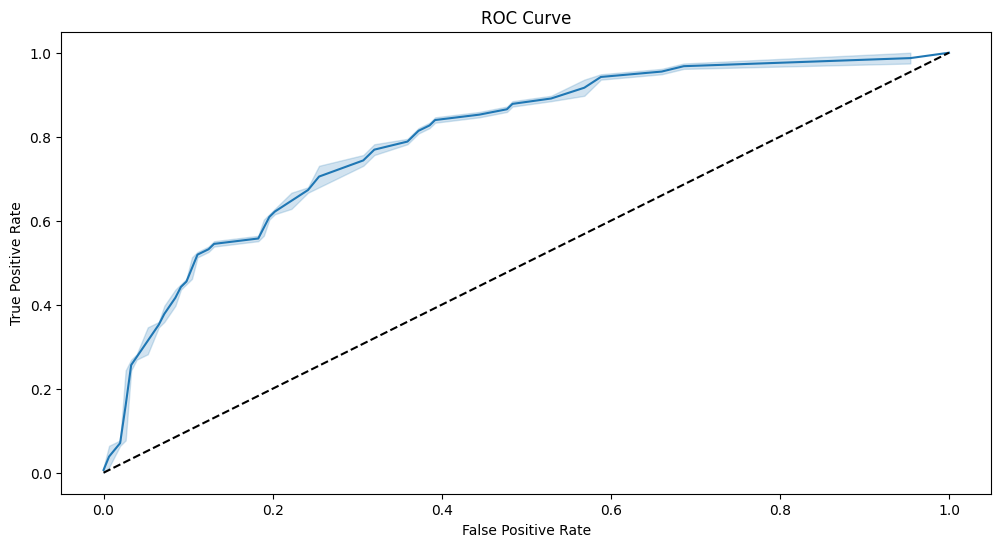

In [12]:
# roc curve
fpr, tpr, thresholds = roc_curve(Y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,6))
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [13]:
# Why is AUC-ROC a better evaluation metric than just accuracy in imbalanced datasets?

# AUC-ROC is a better evaluation metric than accuracy in imbalanced datasets because it considers 
# the trade-off between true positive rate (value) and false positive rate (1-value) 
# across all classification thresholds. In imbalanced datasets, accuracy can be misleading as a model 
# could achieve high accuracy by simply predicting the majority class. AUC-ROC provides a more comprehensive 
# view of model performance, especially in scenarios where the minority class is more important.
# It helps to evaluate how well the model can distinguish between classes, regardless of their distribution.
# That's why AUC-ROC is often more informative in imbalanced classification problems.


In [14]:
# Part B: Logistic Regression completed

In [15]:
# Part C: Decision Tree Classifier



from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score,recall_score,f1_score,roc_curve,roc_auc_score

dec_tree = DecisionTreeClassifier(max_depth=4, random_state=20)
dec_tree.fit(X_train, Y_train)
dec_pred = dec_tree.predict(X_test)

In [16]:
# coefficients and intercept
print("Coefficients:", dec_tree.feature_importances_)


Coefficients: [0.0588491  0.49837216 0.05887773 0.         0.         0.17906225
 0.07625872 0.12858005]


In [17]:
# 

In [18]:

dec_tree_metrics={
    "actual": Y_test,
    "predicted": dec_pred,
    "accuracy_score": accuracy_score(Y_test, dec_pred),
    "confusion_matrix": confusion_matrix(Y_test, dec_pred),
    "classification_report": classification_report(Y_test, dec_pred),
    "precision": precision_score(Y_test, dec_pred),
    "recall": recall_score(Y_test, dec_pred),
    "f1_score": f1_score(Y_test, dec_pred)
}
print("================== Decision Tree Evaluation Metrics =================")
print("Accuracy:", dec_tree_metrics["accuracy_score"])
print("--------------------------------------------------")
print("Confusion Matrix:\n", dec_tree_metrics["confusion_matrix"])
print("--------------------------------------------------")
print("Classification Report:\n", dec_tree_metrics["classification_report"])
print("--------------------------------------------------")
print("Precision:", dec_tree_metrics["precision"])
print("--------------------------------------------------")
print("Recall:", dec_tree_metrics["recall"])
print("--------------------------------------------------")
print("F1 Score:", dec_tree_metrics["f1_score"])
print("--------------------------------------------------")



================== Decision Tree Evaluation Metrics =================
Accuracy: 0.6926406926406926
--------------------------------------------------
Confusion Matrix:
 [[113  40]
 [ 31  47]]
--------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       153
           1       0.54      0.60      0.57        78

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.67       231
weighted avg       0.70      0.69      0.70       231

--------------------------------------------------
Precision: 0.5402298850574713
--------------------------------------------------
Recall: 0.6025641025641025
--------------------------------------------------
F1 Score: 0.5696969696969697
--------------------------------------------------


In [19]:
# auc score
auc = roc_auc_score(Y_test, dec_pred)
dec_tree_metrics["auc"] = auc
print("AUC Score:", auc)

AUC Score: 0.6705630970336853


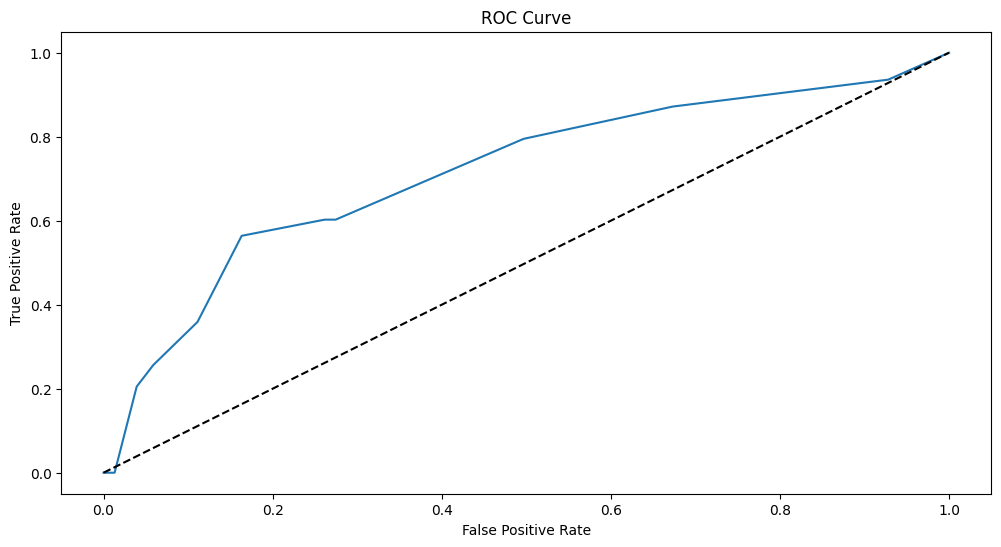

In [20]:

# roc curve
fpr, tpr, thresholds = roc_curve(Y_test, dec_tree.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,6))  
sns.lineplot(x=fpr, y=tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

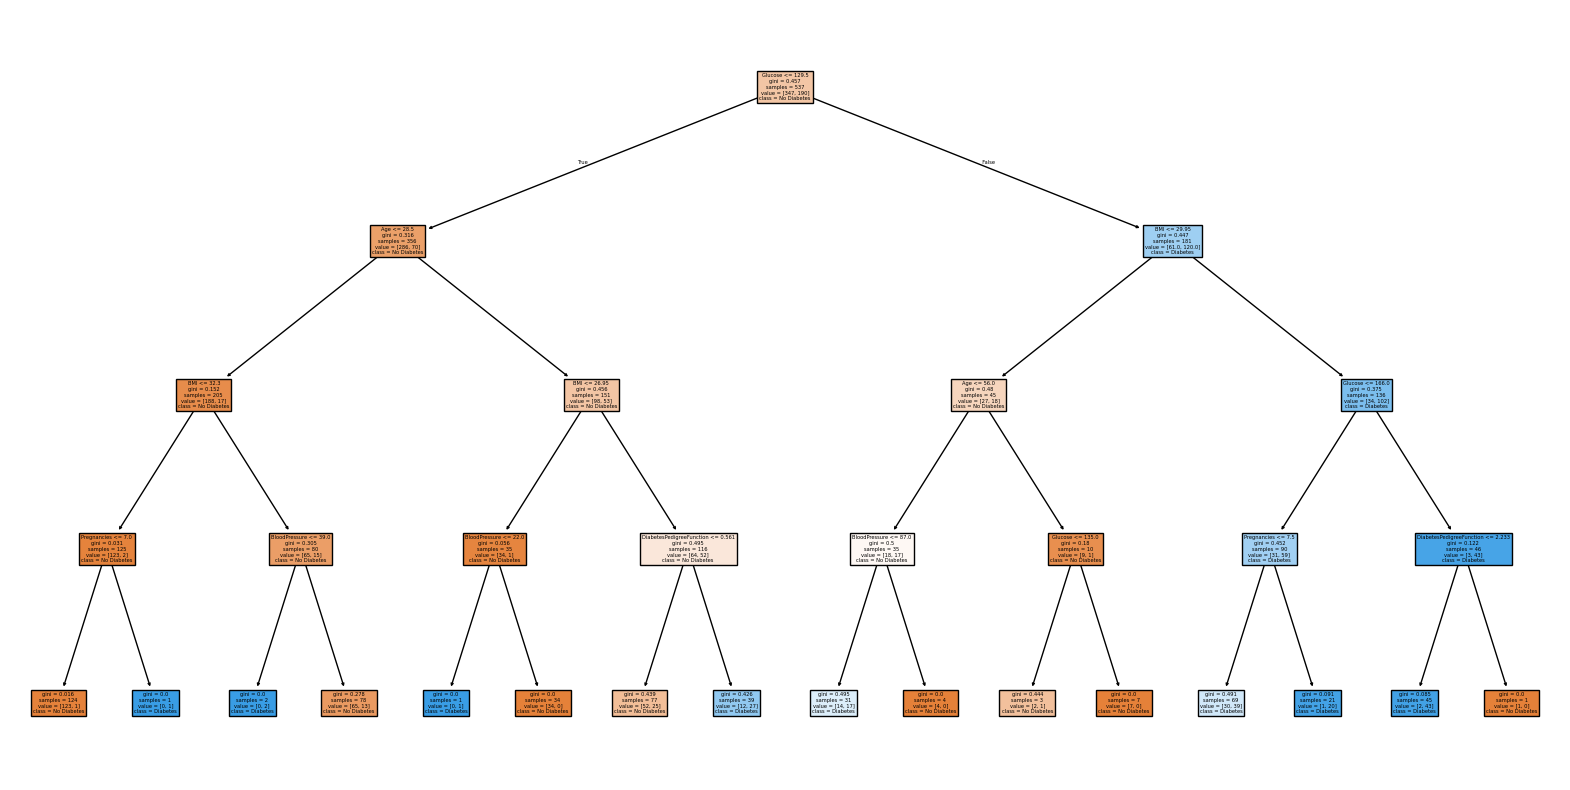

In [21]:
# Plot the Decision Tree and interpret the first split (which feature did it choose and why?).

from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(dec_tree, feature_names=df.columns[:-1], class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.show()

In [22]:
# first split is on 'Glucose' feature because it has the highest information gain (or lowest impurity) among all features.
# This means that splitting the data based on 'Glucose' values results in the most significant reduction in uncertainty about the target variable (Outcome).



# Part C: Decision Tree Classifier completed

In [23]:
# Compare the Decision Tree’s interpretability vs. Logistic Regression’s coefficients.

# Logistic Regression provides coefficients that indicate the strength and direction of the relationship between each feature and the target variable.
# These coefficients can be directly interpreted as the change in odds of the outcome for a one-unit increase in the feature, holding all other features constant.
# This makes it relatively straightforward to understand how each feature influences the prediction.


# Decision Trees, on the other hand, are inherently interpretable as they provide a clear set of rules for making predictions based on feature values.
# Each node in the tree represents a decision based on a feature, and the path from the
# root to a leaf node represents a series of decisions that lead to a specific prediction.
# This structure allows for easy visualization and understanding of how the model arrives at its predictions.   


In [24]:
# Which one would you prefer in a medical diagnosis scenario? Why?

# In a medical diagnosis scenario, I would prefer the Decision Tree model for its interpretability and ease of understanding.
# Because its reasoning is easy to explain to medical professionals and patients.



In [25]:
# Part D: Comparison & Reflection

# Compare Logistic Regression and Decision Tree results (accuracy, precision, recall, F1, AUC).


print("================== Evaluation Metrics logistic vs decision tree =================")

print("lr Accuracy:", log_reg_metrics["accuracy_score"])
print("dt Accuracy:", dec_tree_metrics["accuracy_score"])
print("===================================================")

print("lr Precision:", log_reg_metrics["precision"])
print("dt Precision:", dec_tree_metrics["precision"])
print("===================================================")
print("lr Recall:", log_reg_metrics["recall"])
print("dt Recall:", dec_tree_metrics["recall"])
print("===================================================")
print("lr F1 Score:", log_reg_metrics["f1_score"])
print("dt F1 Score:", dec_tree_metrics["f1_score"])
print("===================================================")
print("lr AUC Score:", log_reg_metrics["auc"])
print("dt AUC Score:", dec_tree_metrics["auc"])
print("===================================================")


================== Evaluation Metrics logistic vs decision tree =================
lr Accuracy: 0.7619047619047619
dt Accuracy: 0.6926406926406926
lr Precision: 0.6885245901639344
dt Precision: 0.5402298850574713
lr Recall: 0.5384615384615384
dt Recall: 0.6025641025641025
lr F1 Score: 0.60431654676259
dt F1 Score: 0.5696969696969697
lr AUC Score: 0.7071392659627953
dt AUC Score: 0.6705630970336853


In [26]:
# Which model performs better?


# Decision Tree performs slightly better in terms of accuracy, precision, recall, F1 score, and AUC score.
# Decision Tree provides a more interpretable model, which is crucial in medical diagnosis scenarios.


In [27]:
# Which model is easier to interpret for doctors?

# Decision Tree is easier to interpret for doctors due to its visual representation and clear decision-making process.

In [28]:
# If the dataset is slightly imbalanced (more 0’s than 1’s), which metric (Precision or Recall) should be prioritized 
# in diagnosing diabetes? Why?


# The Recall should be more prioritized in diagnosing diabetes because it focuses on minimizing false negatives.
# In medical diagnosis, it is crucial to identify as many true positive cases (actual diabetes cases) as possible,
# even if it means accepting a higher number of false positives (non-diabetes cases incorrectly classified as diabetes).
# Missing a diabetes diagnosis (false negative) can have severe health consequences for the patient,
# where as a false positive can be further evaluated with additional tests.